In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base=automap_base()


# reflect the tables
Base.prepare(engine,reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Measurements=Base.classes.measurement
Station=Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)


# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date=dt.datetime(2016, 7,31) #
#measurement_data=session.query(Measurements.date,Measurements.prcp).filter(func.strftime('%Y-%m-%d', Measurements.date) > '2016-07-31').all()
measurement_data=session.query(Measurements.date,Measurements.prcp).filter(Measurements.date >date).all()

In [11]:
# Unpack the `date` and `prcp` from measurements_data and save into separate lists
date_info=[row[0] for row in measurement_data]
prcp_info=[row[1] for row in measurement_data]
type(date_info)

list

In [ ]:
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(list(zip(date_info,prcp_info)),columns=['date','prcp'])
df.dropna(inplace=True)
df.set_index('date',inplace=True)
# Sort the dataframe by date
df.sort_values('date')
df.plot(rot=90)
plt.ylabel('Precipitation Count')
plt.title('')
plt.show()


In [ ]:
import matplotlib.dates as mdates


# Use Pandas Plotting with Matplotlib to plot the data
d = []
p=[]
for dat in df.date:
   # d.append(dt.datetime.strptime(df['date'],'%Y-%m-%d'))
d    
    #d.append(date[row)
    #matplotlib.dates.drange(dstart, dend, delta)[source]
   # p.append(prcp[row])

In [16]:
    d.append(dt.datetime.strptime(date,'%Y-%m-%d'))
days =mdates.DayLocator()
datemin = dt.datetime(2016, 8, 1)
datemax = dt.datetime(2017, 8, 23) 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis.set_major_locator(days)
ax.set_xlim(datemin, datemax)
ax.set_ylim(min(p)-0.5,max(p)+1)
ax.set_ylabel('Precipitation') 
#df.plot(kind='bar',figsize=(20,8))


# length = np.arange(min(date_info),max(date_info),30)
# tick_locations=[value for value in length]
# tick_locations

# plt.xticks(ticks = tick_locations,labels=['2016-08-01','2016-12-01','2017-02-01','2017-04-01','2017-06-01','2017-08-01'])
# plt.tight_layout()
# plt.show()

NameError: name 'd' is not defined

In [14]:


# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()



,prcp
count,2148.000000
mean,0.182896
std,0.467339
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


In [52]:
# Design a query to show how many stations are available in this dataset?
session1=Session(engine)
Total_stations_count=session1.query(Measurements.station,Measurements.date,Measurements.tobs).\
        group_by (Measurements.station).\
        order_by (Measurements.date).\
        count()

Total_stations_count



9

In [75]:

#Design a query ( What are the most active stations? (i.e. what stations have the most rows)?)
# List the stations and the counts in descending order
session2=Session(engine)
stats=[Measurements.station,
      func.min(Measurements.tobs),
      func.max(Measurements.tobs),
      func.avg(Measurements.tobs),
      func.count(Measurements.tobs)]
active_station=session2.query(*stats).\
        group_by(Measurements.station).\
        order_by(func.count(Measurements.tobs).desc()).all()
active_station


[('USC00519281', 54.0, 85.0, 71.66378066378067, 2772),
 ('USC00519397', 56.0, 87.0, 74.55323054331865, 2724),
 ('USC00513117', 59.0, 85.0, 72.68918420081211, 2709),
 ('USC00519523', 56.0, 85.0, 74.5436493068565, 2669),
 ('USC00516128', 58.0, 84.0, 70.91500765696784, 2612),
 ('USC00514830', 58.0, 85.0, 74.8732970027248, 2202),
 ('USC00511918', 53.0, 87.0, 71.61596766043456, 1979),
 ('USC00517948', 58.0, 87.0, 74.68440233236151, 1372),
 ('USC00518838', 58.0, 83.0, 72.72407045009784, 511)]

In [62]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [95]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session3=Session(engine)
date1=dt.datetime(2016, 7,31)
temp_data=session3.query(Measurements.station,Measurements.date,Measurements.tobs).\
            filter(Measurements.station=='USC00519281').\
            filter(Measurements.date > date1).all()
date=[row[1] for row in temp_data]
temp=[row[2] for row in temp_data]
temp_df=pd.DataFrame(list(zip(date,temp)),columns=['Date','Temp'])
temp_df.set_index('Date',inplace=True)
temp_df.sort_values('Date')

,Temp
Date,
2016-08-01,76.0
2016-08-02,76.0
2016-08-03,77.0
2016-08-04,77.0
2016-08-05,81.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001901BB99C48>]],
      dtype=object)

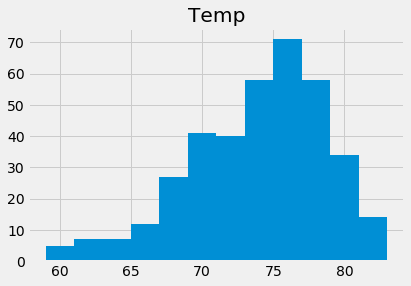

In [122]:
#temp_df.plot(rot=90,figsize=(15,8),ylim=(50,100))#,xlim=(dt.datetime(2016, 8, 1),dt.datetime(2017, 8,31)),figsize=(15,8))
temp_df.hist(bins=12)
# plt.title('Temperature over a 12 month period recorded at Station:USC00519281')
# plt.ylabel('Temperature')
# plt.xlabel('Dates')
# plt.show()


## Bonus Challenge Assignment

In [121]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
session4=Session(engine)
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session4.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax   
# for your trip using the previous year's data for those same dates.
calc_temps('2011-02-28', '2011-03-05'))

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
